<h1 align="center">CREACIÓN DE UN DATASET PARA MACHINE LEARNING</h1>

<h2 align="center">LECTURA Y PLOTEO DE DATOS</h2>

(Text(0.5, 0, 'Cantidad de muestras'), Text(0, 0.5, 'mV'))

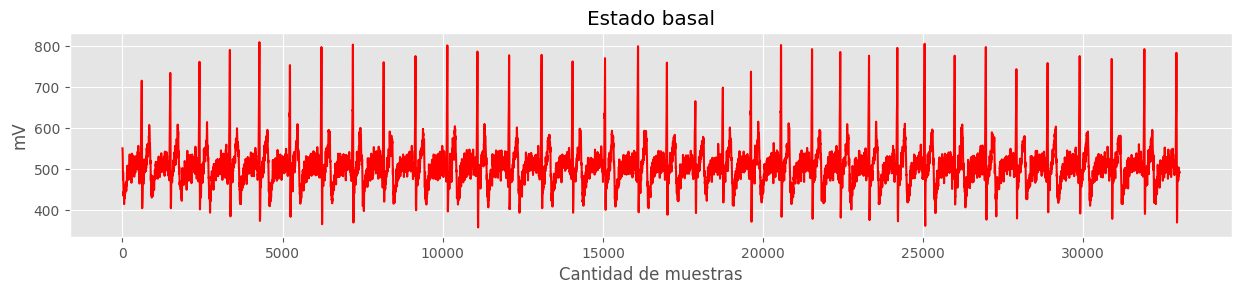

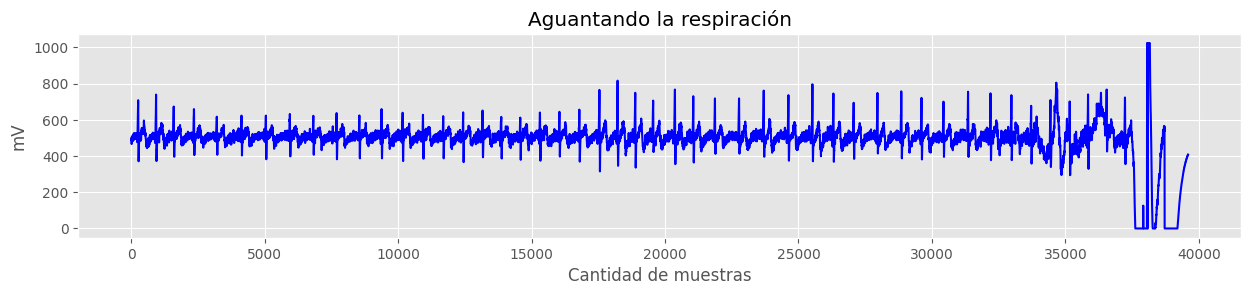

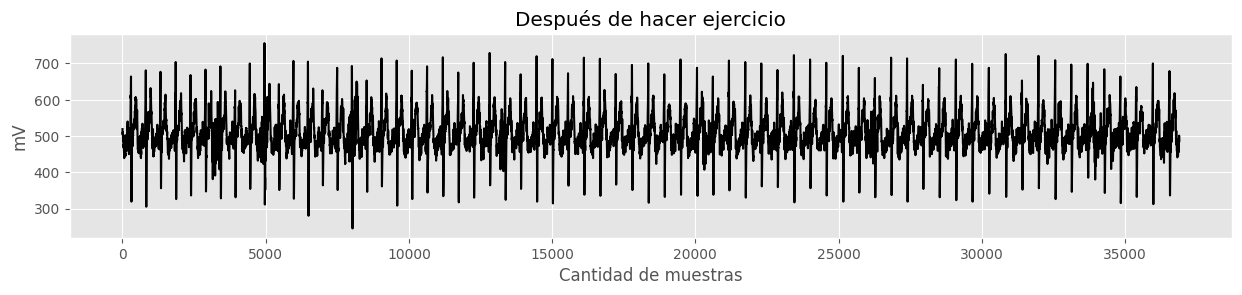

In [71]:
#Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Seleccionamos estilo de ploteo
plt.style.use("ggplot")

array_basal = np.genfromtxt("ecg_basal-andres.txt", delimiter="\t")
array_Respiracion = np.genfromtxt("ecg-aguantando-respiracion-andres.txt", delimiter="\t")
array_ejercicio = np.genfromtxt("egc_ejercicio_andres.txt", delimiter="\t")
d_sensor_basal= array_basal[:,-2]
d_sensor_respi = array_Respiracion[:,-2]
d_sensor_ejer = array_ejercicio[:,-2]


plt.figure(figsize=(15, 9));plt.subplot(3,1,1);plt.plot(d_sensor_basal,'r');plt.title('Estado basal');plt.xlabel('Cantidad de muestras'), plt.ylabel('mV')
plt.figure(figsize=(15, 9));plt.subplot(3,1,2);plt.plot(d_sensor_respi,'b');plt.title('Aguantando la respiración');plt.xlabel('Cantidad de muestras'), plt.ylabel('mV')
plt.figure(figsize=(15, 9));plt.subplot(3,1,3);plt.plot(d_sensor_ejer,'k');plt.title('Después de hacer ejercicio');plt.xlabel('Cantidad de muestras'), plt.ylabel('mV')


### Ploteo con xlim para ver mejor la señal y las ondas características del ECG

(0.0, 5000.0)

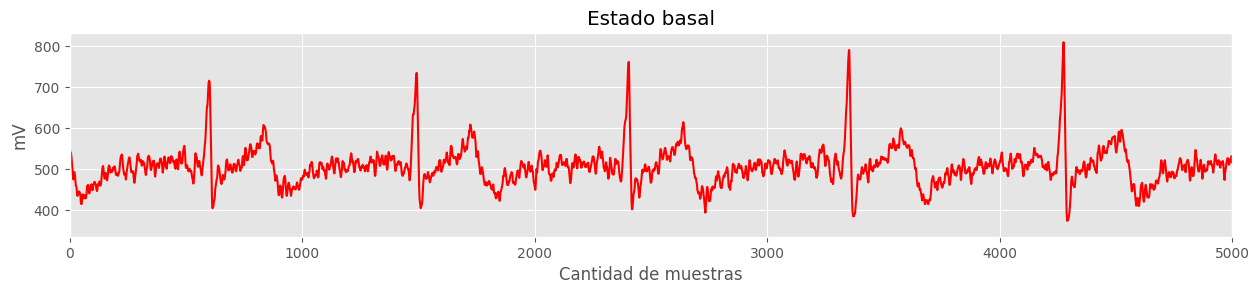

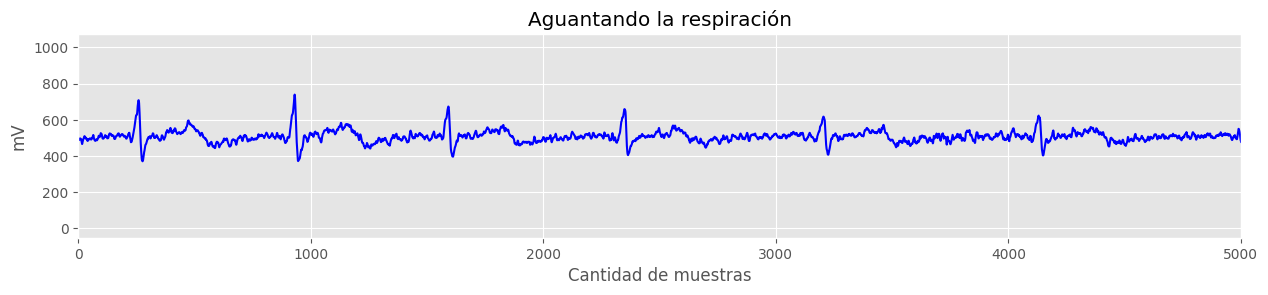

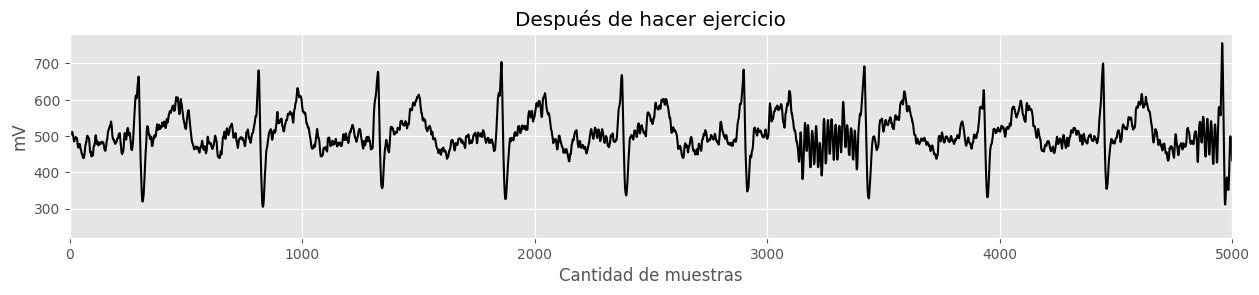

In [72]:
plt.figure(figsize=(15, 9));plt.subplot(3,1,1);plt.plot(d_sensor_basal,'r');plt.title('Estado basal');plt.xlabel('Cantidad de muestras'); plt.ylabel('mV');plt.xlim(0,5000)
plt.figure(figsize=(15, 9));plt.subplot(3,1,2);plt.plot(d_sensor_respi,'b');plt.title('Aguantando la respiración');plt.xlabel('Cantidad de muestras');plt.ylabel('mV');plt.xlim(0,5000)
plt.figure(figsize=(15, 9));plt.subplot(3,1,3);plt.plot(d_sensor_ejer,'k');plt.title('Después de hacer ejercicio');plt.xlabel('Cantidad de muestras'); plt.ylabel('mV');plt.xlim(0,5000)


<h2 align="center">PRIMER CORTE: POR INDEXACIÓN</h2>

Este corte se realizó solo en los datos recolectados durante el aguante de la respiración, ya que, a simple vista se puede descartar los últimos datos

(Text(0.5, 0, 'Cantidad de muestras'), Text(0, 0.5, 'mV'))

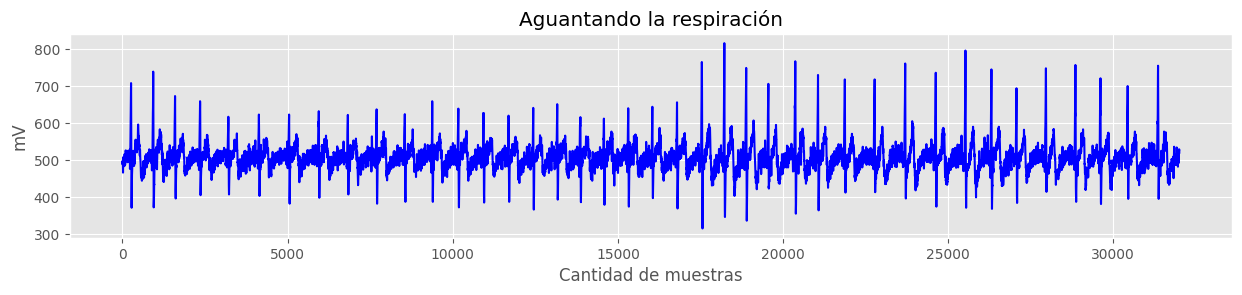

In [73]:
#de la señal respiración
d_sensor_respi=d_sensor_respi[0:32000]
plt.figure(figsize=(15, 9))
plt.subplot(3,1,2);plt.plot(d_sensor_respi,'b');plt.title('Aguantando la respiración');plt.xlabel('Cantidad de muestras'), plt.ylabel('mV')



<h2 align="center">PLOTEO DE LAS SEÑALES CON REPECTO AL TIEMPO</h2>

Se tomó la misma frecuencia de muestreo debido a que en los 3 experimentos esta se mantuvo constante, mientras que, el número de datos de cada señal es diferente.

(Text(0.5, 0, 'Tiempo'), Text(0, 0.5, 'mV'))

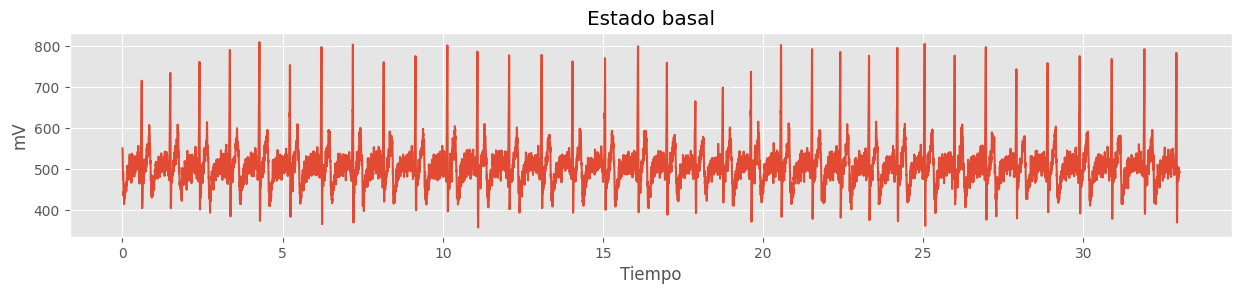

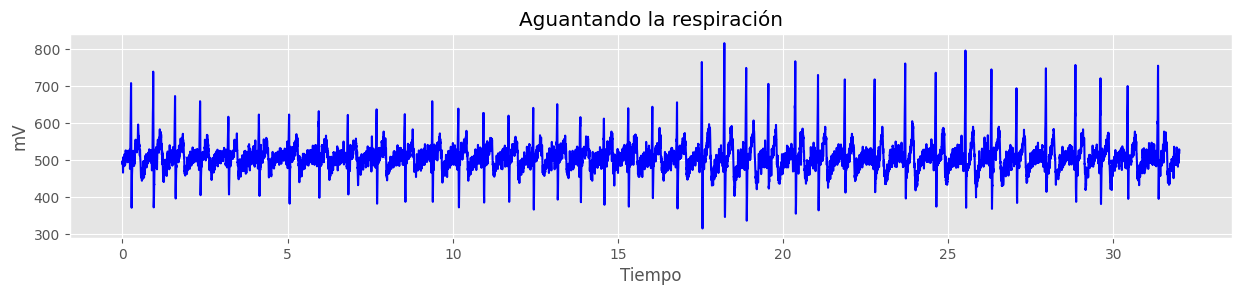

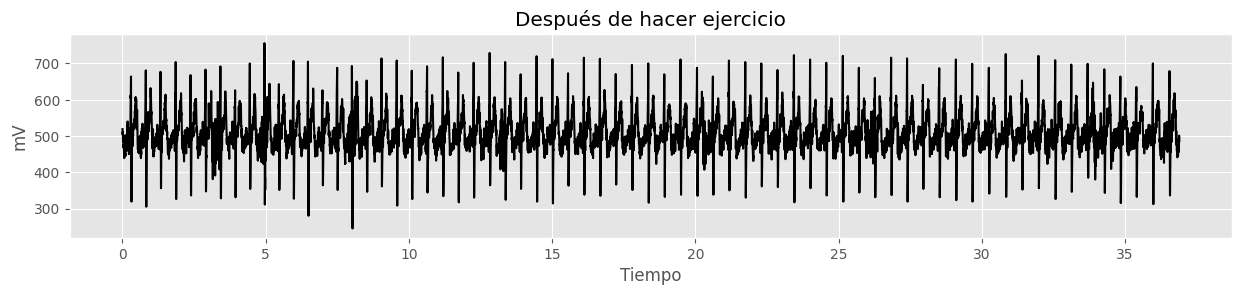

In [74]:
Fs = 1000 #Frecuencia de muestreo del dispositivo de adquisición
Ts=1/Fs
#número de muestras para cada señal
n_b = np.arange(0,len(d_sensor_basal))  # t = n*Ts
n_r = np.arange(0,len(d_sensor_respi ))  
n_e = np.arange(0,len(d_sensor_ejer )) 

#tiempo de cada señal
t_b = n_b*Ts
t_r = n_r*Ts
t_e = n_e*Ts

#Ploteamos la señal en el tiempo
plt.figure(figsize=(15, 9));plt.subplot(3,1,1);plt.plot(t_b,d_sensor_basal);plt.title('Estado basal');plt.xlabel('Tiempo'), plt.ylabel('mV')
plt.figure(figsize=(15, 9));plt.subplot(3,1,2);plt.plot(t_r,d_sensor_respi,'b');plt.title('Aguantando la respiración');plt.xlabel('Tiempo'), plt.ylabel('mV')
plt.figure(figsize=(15, 9));plt.subplot(3,1,3);plt.plot(t_e,d_sensor_ejer,'k');plt.title('Después de hacer ejercicio');plt.xlabel('Tiempo'), plt.ylabel('mV')


### Ploteo con xlim para ver mejor la señal con respecto

(0.0, 5.0)

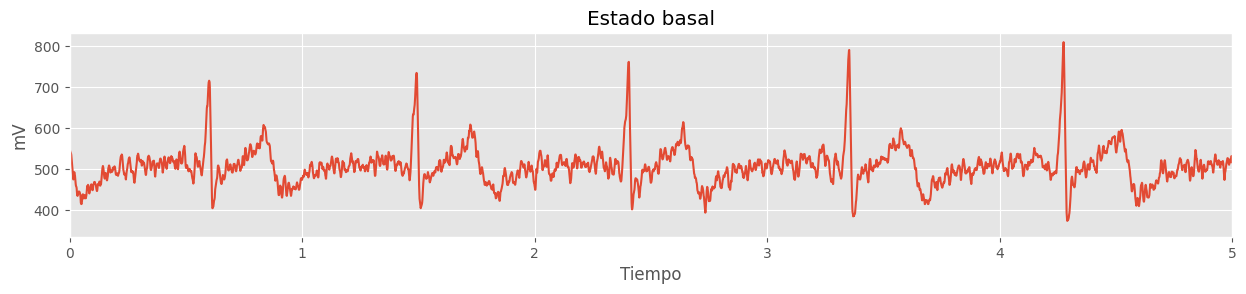

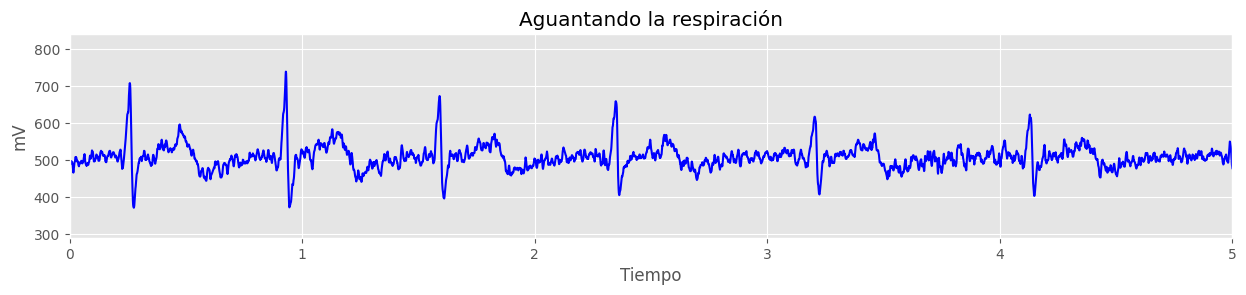

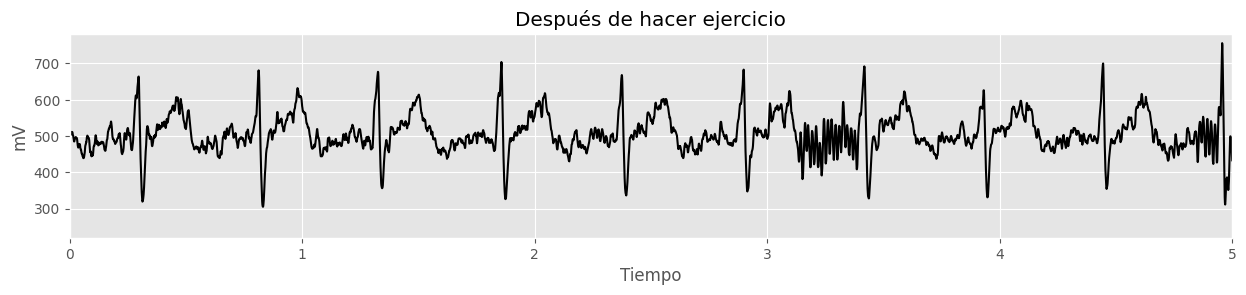

In [75]:
plt.figure(figsize=(15, 9));plt.subplot(3,1,1);plt.plot(t_b,d_sensor_basal);plt.title('Estado basal');plt.xlabel('Tiempo');plt.ylabel('mV');plt.xlim(0,5)
plt.figure(figsize=(15, 9));plt.subplot(3,1,2);plt.plot(t_r,d_sensor_respi,'b');plt.title('Aguantando la respiración');plt.xlabel('Tiempo'), plt.ylabel('mV');plt.xlim(0,5)
plt.figure(figsize=(15, 9));plt.subplot(3,1,3);plt.plot(t_e,d_sensor_ejer,'k');plt.title('Después de hacer ejercicio');plt.xlabel('Tiempo'), plt.ylabel('mV');plt.xlim(0,5)

<h2 align="center">CREACIÓN DEL SET DE DATOS</h2>

In [76]:
#Pasamos las observaciones a filas correspondientes a una variable t y d_sensor
st_sensor_basal = np.concatenate((t_b.reshape(-1,1),  d_sensor_basal.reshape(-1,1)), axis=1)
st_sensor_resp = np.concatenate((t_r.reshape(-1,1),  d_sensor_respi.reshape(-1,1)), axis=1)
st_sensor_ejer = np.concatenate((t_e.reshape(-1,1),  d_sensor_ejer.reshape(-1,1)), axis=1)

#Creamos el data frame 
df_b = pd.DataFrame(st_sensor_basal, columns=["t","d_sensor_basal"])
df_r = pd.DataFrame(st_sensor_resp, columns=["t","d_sensor_resp"])
df_e = pd.DataFrame(st_sensor_ejer, columns=["t","d_sensor_e"])

df_b = df_b.set_index("t")
df_r = df_r.set_index("t")
df_e = df_e.set_index("t")

In [77]:
print(df_b.head());print(df_r.head());print(df_e.head())

       d_sensor_basal
t                    
0.000           550.0
0.001           545.0
0.002           544.0
0.003           542.0
0.004           540.0
       d_sensor_resp
t                   
0.000          496.0
0.001          495.0
0.002          490.0
0.003          488.0
0.004          492.0
       d_sensor_e
t                
0.000       519.0
0.001       517.0
0.002       512.0
0.003       509.0
0.004       509.0


(0.0, 1.0)

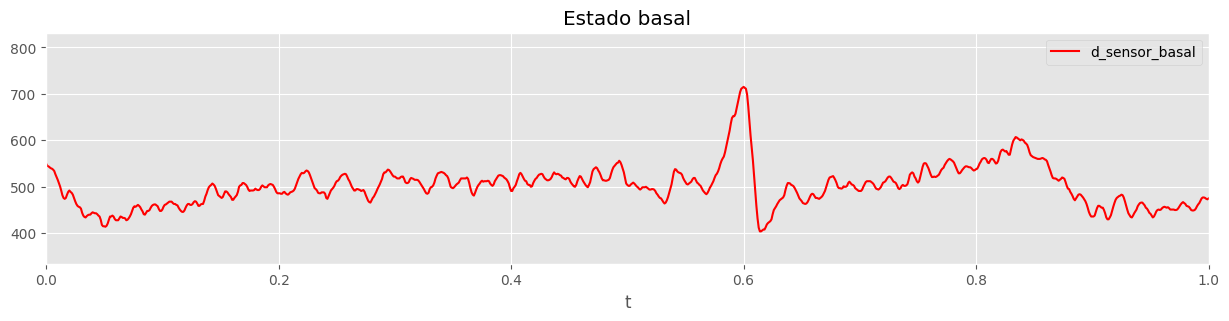

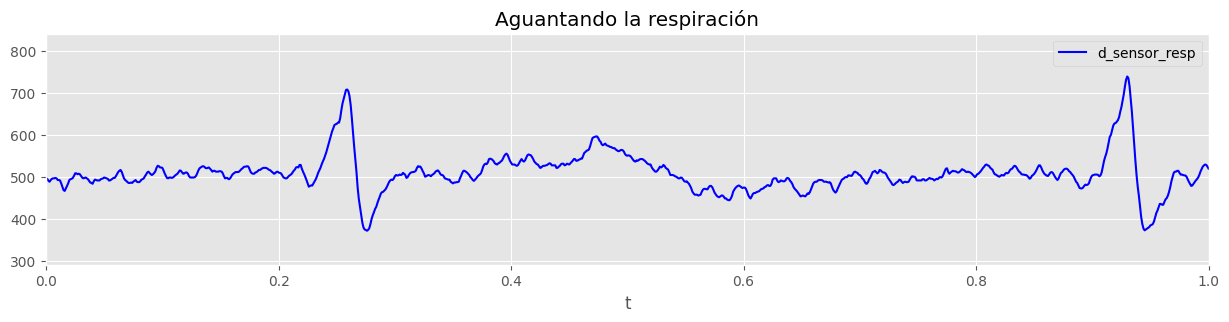

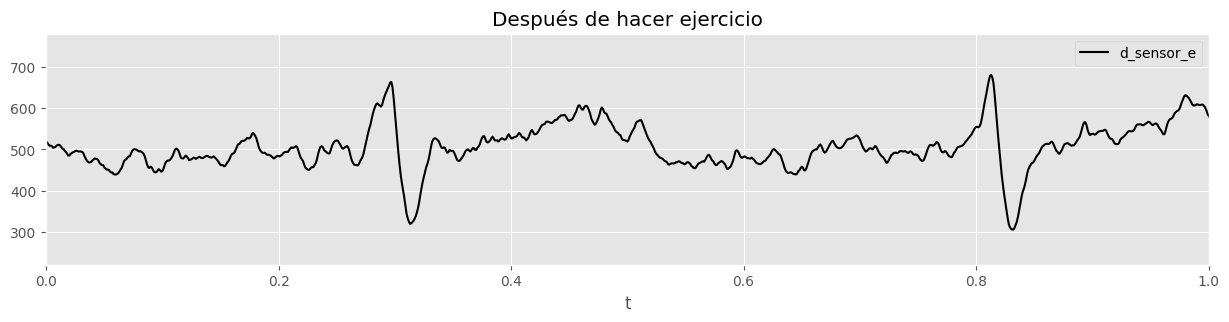

In [78]:
#Ploteamos la señal en un segundo
df_b.plot(figsize=(15,3),color='red',title='Estado basal');plt.xlim(0,1)
df_r.plot(figsize=(15,3),color='blue',title='Aguantando la respiración');plt.xlim(0,1)
df_e.plot(figsize=(15,3),color='black',title='Después de hacer ejercicio');plt.xlim(0,1)


<h2 align="center">Tabulación de datos estilo Sklearn</h2>

(Text(0.5, 0, 'Tiempo'), Text(0, 0.5, 'mV'))

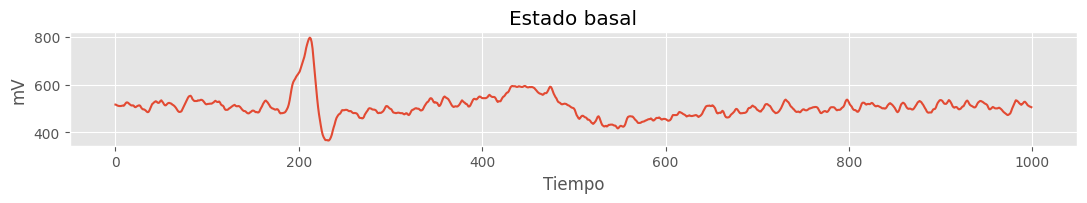

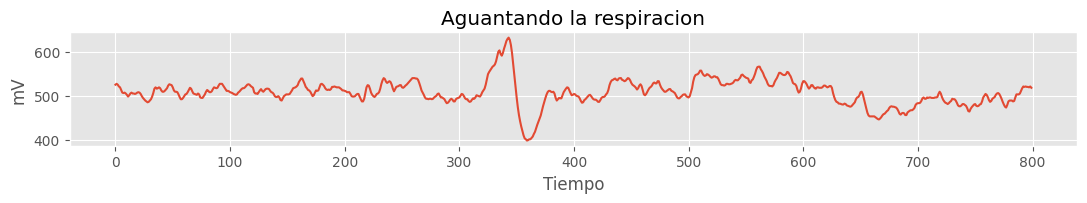

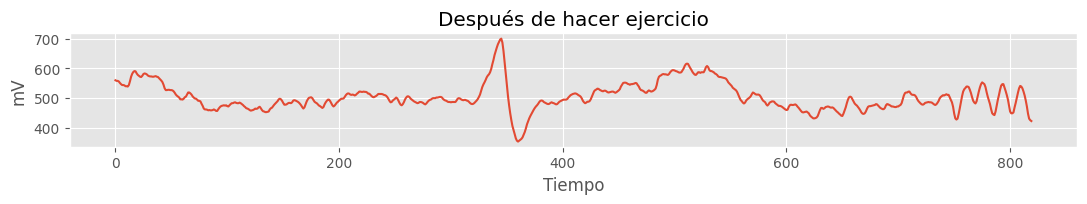

In [79]:
d_obs_basal= df_b[['d_sensor_basal']].values.reshape(33,1000)
d_obs_resp= df_r[['d_sensor_resp']].values.reshape(40,800)
d_obs_ejerc= df_e[['d_sensor_e']].values.reshape(45,820)
b=6
r=7
e=5
plt.figure(figsize=(13,5));plt.subplot(3,1,1);plt.plot(d_obs_basal[b]);plt.title('Estado basal');plt.xlabel('Tiempo'), plt.ylabel('mV')
plt.figure(figsize=(13,5));plt.subplot(3,1,2);plt.plot(d_obs_resp[r]);plt.title('Aguantando la respiracion');plt.xlabel('Tiempo'), plt.ylabel('mV')
plt.figure(figsize=(13,5));plt.subplot(3,1,3);plt.plot(d_obs_ejerc[e]);plt.title('Después de hacer ejercicio');plt.xlabel('Tiempo'), plt.ylabel('mV')

Creamos las categorias

In [80]:
target_0 = np.zeros(d_obs_basal.shape[0])
target_1= np.ones(d_obs_resp.shape[0])
target_2 = np.repeat(2, d_obs_ejerc.shape[0])
print(len(target_0));print(len(target_1));print(len(target_2))

33
40
45


Aplanamos las 3 series de datos, para después concatenarlos

In [81]:
b= d_obs_basal.flatten()
r= d_obs_resp.flatten()
e= d_obs_ejerc.flatten()
print(b)
final_array= np.concatenate((b,r,e))
print(np.shape(final_array))

[550. 545. 544. ... 491. 493. 492.]
(101900,)


| Descripción | Categoria |
|----------|----------|
| Basal    | 0   |
| Aguantar la respiración   | 1   | 
| Post-Ejercicio    | 2   |


In [82]:
ECG_G_neurona= {"data": final_array.reshape(100,1019), "target": np.concatenate((target_0,target_1,target_2))}
print(ECG_G_neurona)
ECG_G_neurona['data'][0]

{'data': array([[550., 545., 544., ..., 488., 489., 488.],
       [485., 486., 487., ..., 497., 501., 506.],
       [507., 505., 506., ..., 499., 498., 497.],
       ...,
       [556., 559., 559., ..., 324., 325., 330.],
       [337., 344., 354., ..., 525., 528., 527.],
       [524., 521., 520., ..., 491., 491., 487.]]), 'target': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])}


array([550., 545., 544., ..., 488., 489., 488.])

<h1 align="center">PARTE DE FILTRADO</h1>

## FILTRO PASA BAJA IIR

In [83]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [84]:
ECG_G_neurona
senal=d_sensor_basal

Text(0.5, 1.0, 'Análisis en frecuencia')

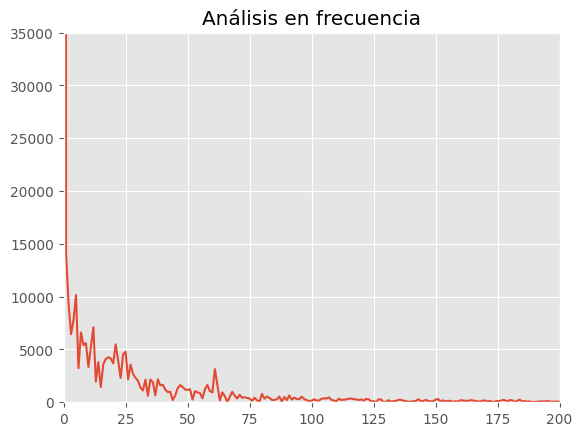

In [85]:
#Realizamos el análisis en frecuencia
N=2**10 # 10 bits
X3 = np.fft.fft(senal,N)
X3 = X3[0:N//2]
X3m = np.abs(X3)
F = np.linspace(0,Fs/2,N//2)
plt.plot(abs(X3));plt.xlim(0,200);plt.ylim(0,35000);plt.title('Análisis en frecuencia')

In [86]:
#calculamos el orden de filtro y la frecuencia de corte sugerida
wp=94
ws=157
N_ord, Wc= signal.buttord(wp, ws, gpass=3, gstop=40, analog=True) #gpass=loss in passband edge frecuencies, gstop= attenuation in stopband edge frecuencies 
fc = np.round(Wc/(2*np.pi) ,2) 
print(f"Orden del filtro: {N_ord}")
print(f"Frecuencia de corte calculada: {fc} hz")
#usamos la sugerencia

Orden del filtro: 9
Frecuencia de corte calculada: 14.96 hz


[3.53025526e-10 7.12712634e-09 7.18371304e-08 ... 3.88322769e+02
 3.92368979e+02 3.97286724e+02]


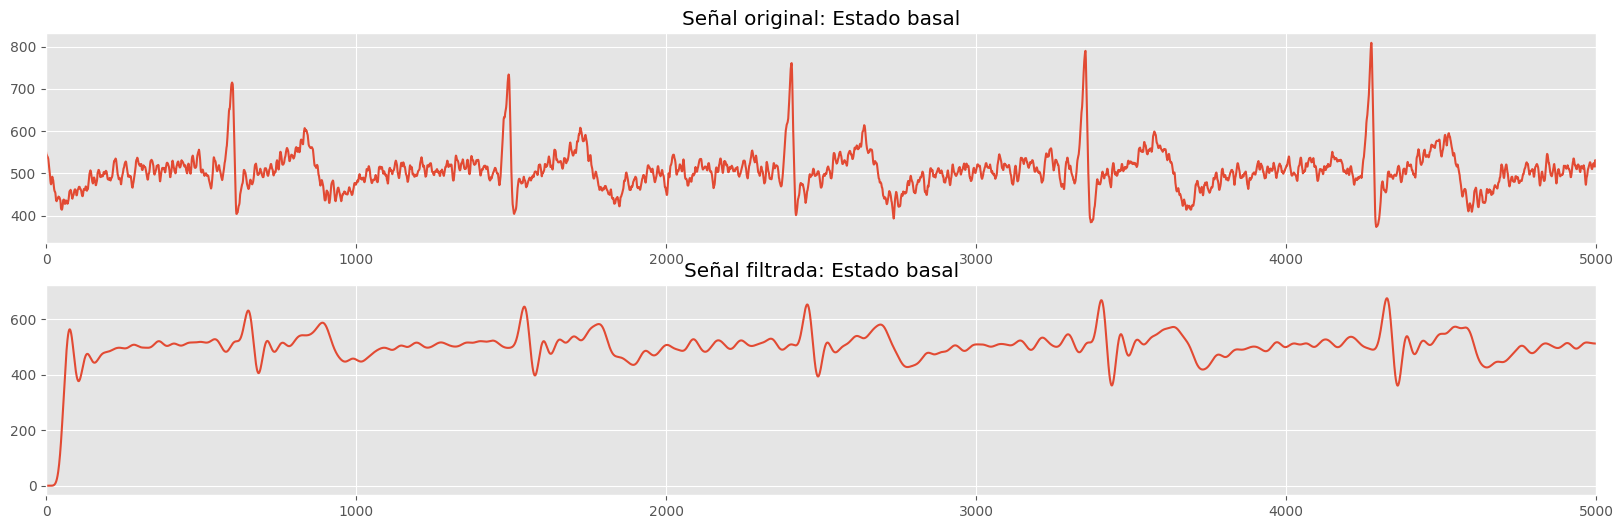

In [87]:
#Usamos la fc sugerida
senal=d_sensor_basal
Wc=20*2*np.pi
Fs=1000 
N_ord=10
b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')
bd, ad = signal.bilinear(b,a,Fs)
y = signal.lfilter(bd,ad, senal)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,senal);plt.title('Señal original: Estado basal');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y);plt.title('Señal filtrada: Estado basal');plt.xlim(0,5000)
print(y)

(0.0, 5000.0)

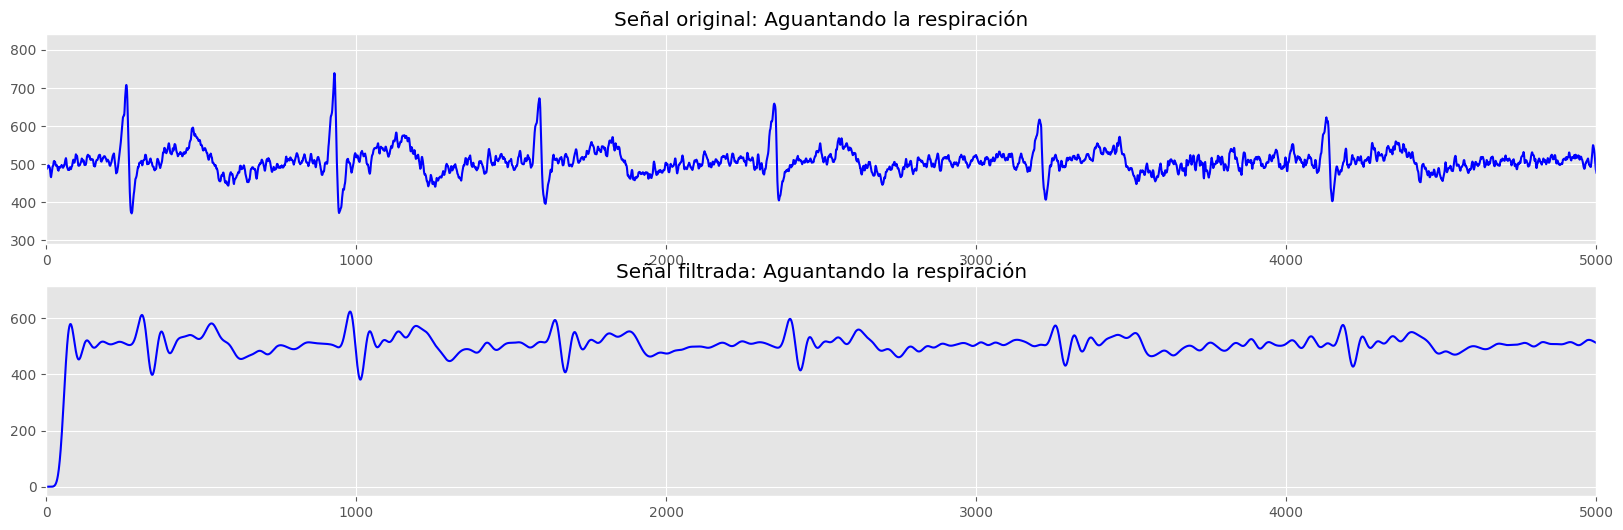

In [88]:
senal=d_sensor_respi
#Usamos la fc sugerida
Wc=20*2*np.pi
Fs=1000 
N_ord=10
b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')
bd, ad = signal.bilinear(b,a,Fs)
y = signal.lfilter(bd,ad, senal)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,senal,'b');plt.title('Señal original: Aguantando la respiración');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'b');plt.title('Señal filtrada: Aguantando la respiración');plt.xlim(0,5000)

[3.33127724e-10 6.72716029e-09 6.78207640e-08 ... 4.58445582e+02
 4.58942791e+02 4.59471456e+02]


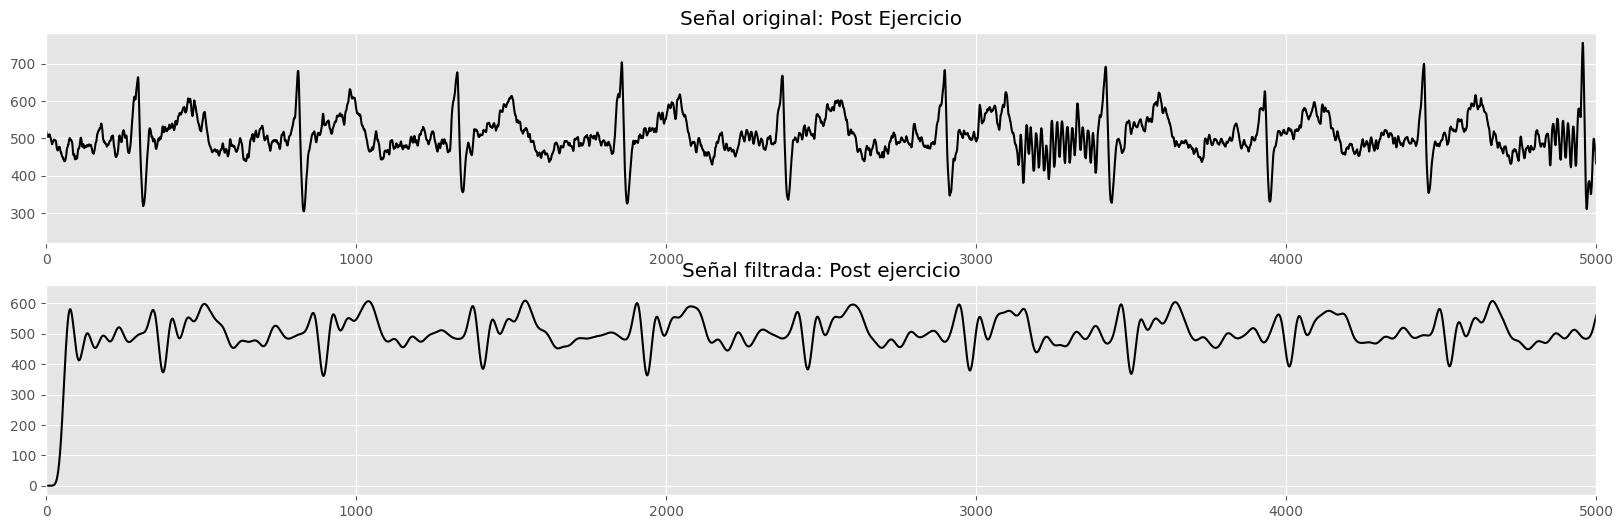

In [89]:
senal=d_sensor_ejer
#Usamos la fc sugerida
Wc=20*2*np.pi
Fs=1000 
N_ord=10
b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')
bd, ad = signal.bilinear(b,a,Fs)
y = signal.lfilter(bd,ad, senal)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,senal,'k');plt.title('Señal original: Post Ejercicio');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'k');plt.title('Señal filtrada: Post ejercicio');plt.xlim(0,5000)
print(y)

## FILTRO PASABAJA IIR CON PYFDA

(0.0, 5000.0)

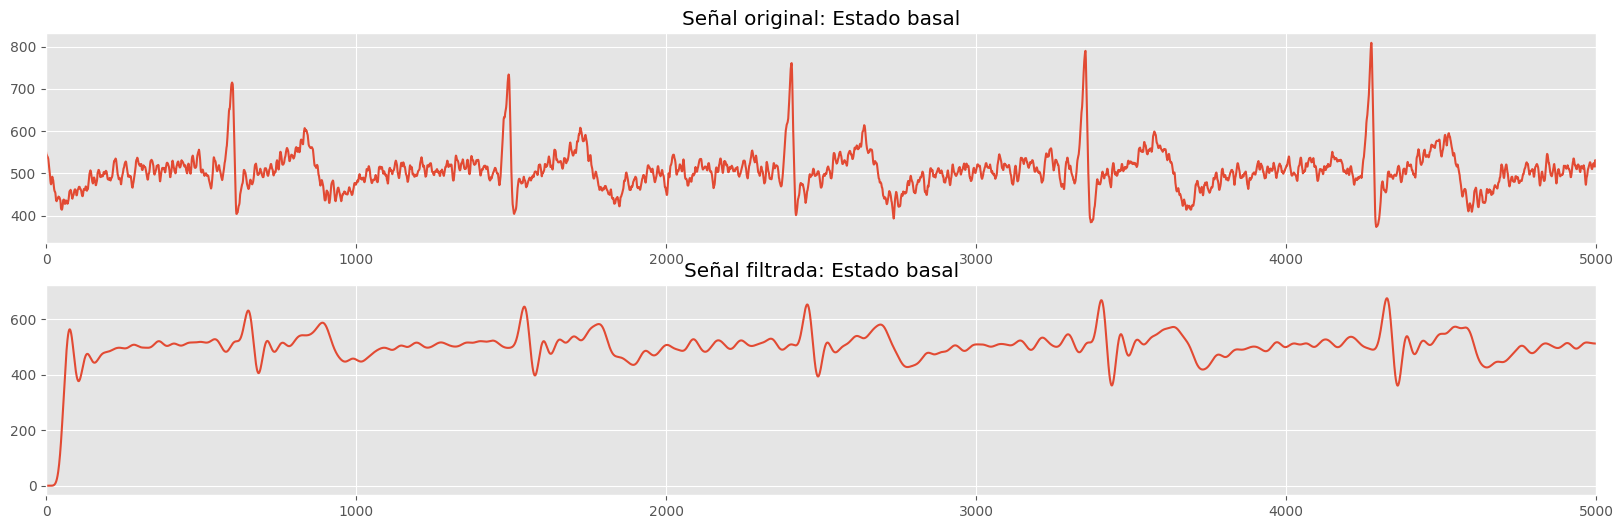

In [90]:
Fs = 1000
b_eliptic = np.array([0.009932,-0.09761,0.4333,-1.144,1.991,-2.385,1.991,-1.144,0.4333,-0.09761,0.009932])
a_eliptic = np.array([1,-9.87,43.89,-115.8,200.9,-239.2,198.1,-112.6,42.08,-9.328,0.9318])
bd, ad = signal.bilinear(b,a,Fs)
y = signal.lfilter(bd,ad, d_sensor_basal)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_basal);plt.title('Señal original: Estado basal');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y);plt.title('Señal filtrada: Estado basal');plt.xlim(0,5000)

(0.0, 5000.0)

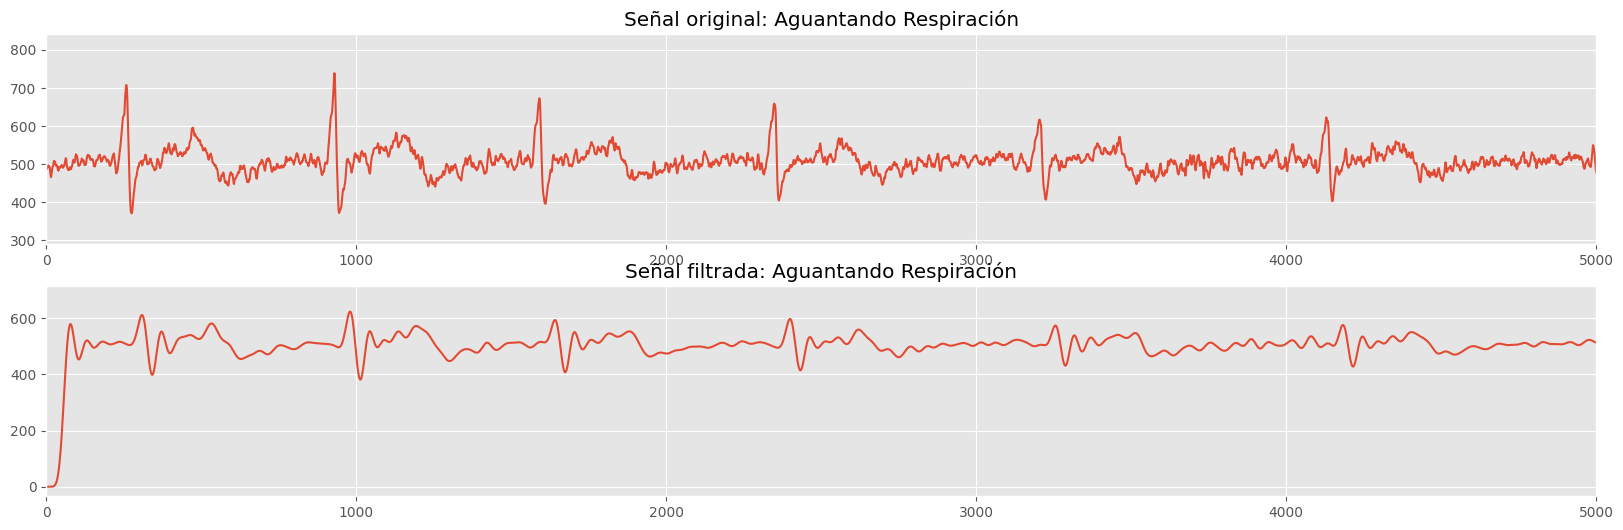

In [91]:
Fs = 1000
b_eliptic = np.array([0.009932,-0.09761,0.4333,-1.144,1.991,-2.385,1.991,-1.144,0.4333,-0.09761,0.009932])
a_eliptic = np.array([1,-9.87,43.89,-115.8,200.9,-239.2,198.1,-112.6,42.08,-9.328,0.9318])
bd, ad = signal.bilinear(b,a,Fs)
y = signal.lfilter(bd,ad, d_sensor_respi)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_respi);plt.title('Señal original: Aguantando Respiración');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y);plt.title('Señal filtrada: Aguantando Respiración');plt.xlim(0,5000)

(0.0, 5000.0)

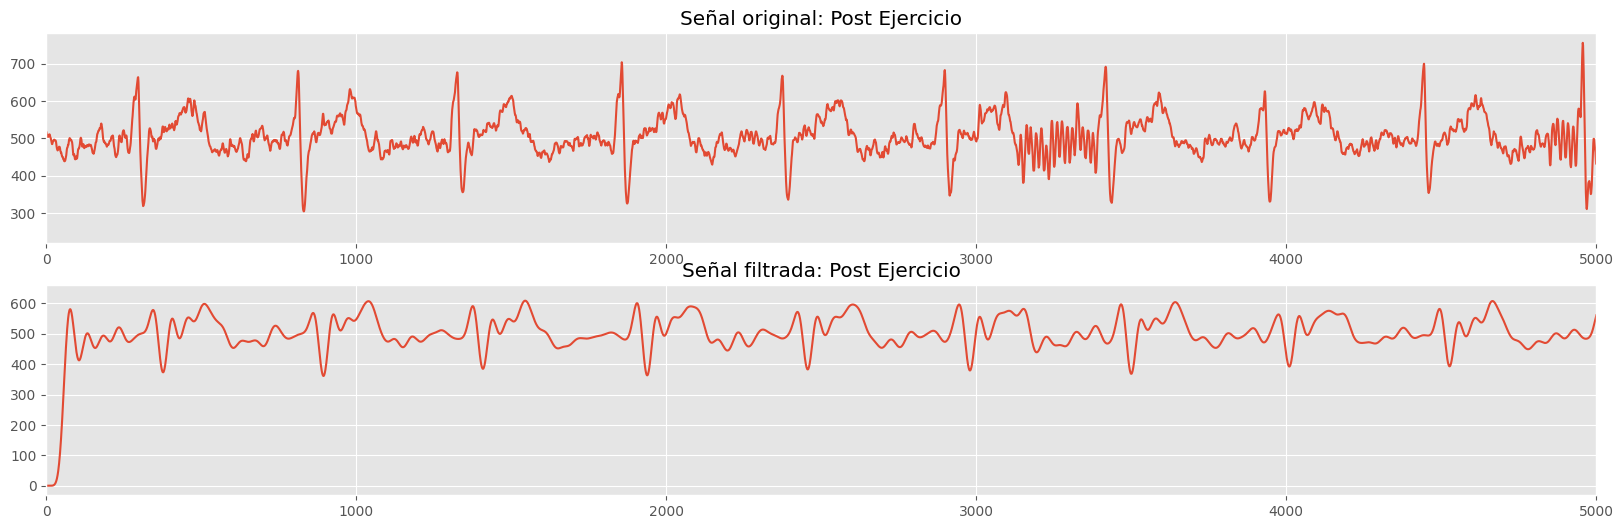

In [92]:
Fs = 1000
b_eliptic = np.array([0.009932,-0.09761,0.4333,-1.144,1.991,-2.385,1.991,-1.144,0.4333,-0.09761,0.009932])
a_eliptic = np.array([1,-9.87,43.89,-115.8,200.9,-239.2,198.1,-112.6,42.08,-9.328,0.9318])
bd, ad = signal.bilinear(b,a,Fs)
y = signal.lfilter(bd,ad, d_sensor_ejer)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_ejer);plt.title('Señal original: Post Ejercicio');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y);plt.title('Señal filtrada: Post Ejercicio');plt.xlim(0,5000)

## FILTRO PASA BAJA FIR

Acotación: El cálculo de los Filtros FIR fueron mediante Pyfda

### FIR Blackman

(0.0, 5000.0)

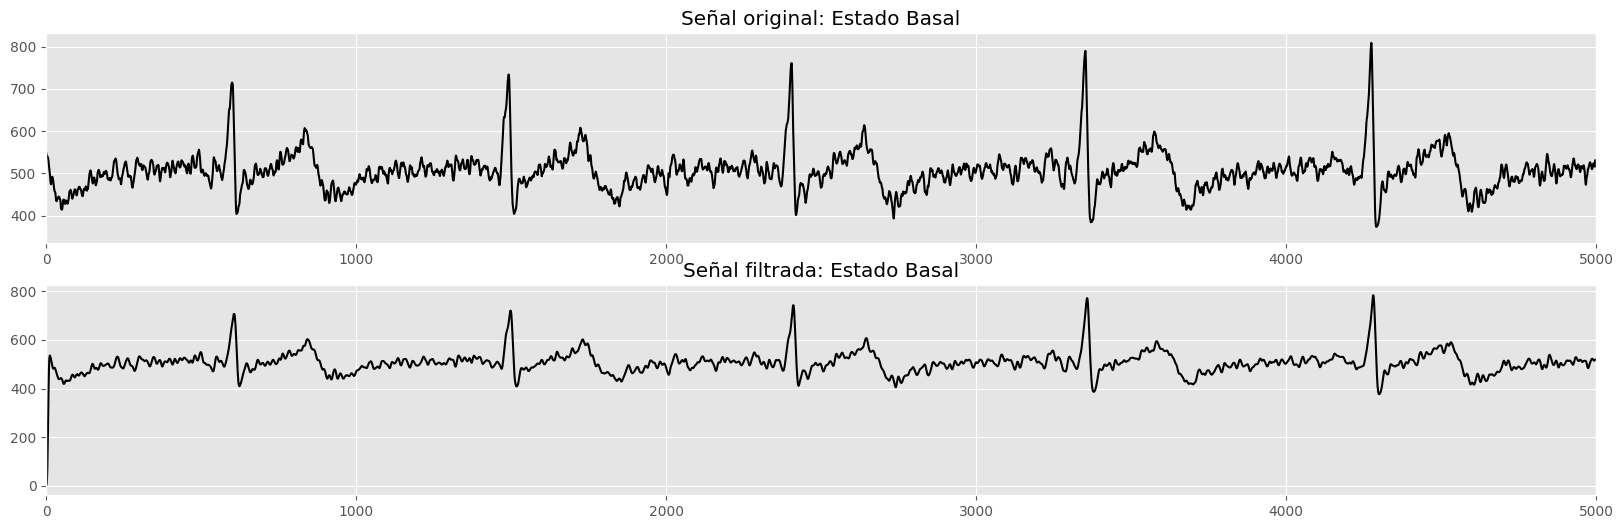

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Coeficientes extraidos de Pyfda
#
b_blackman = np.array([-2.094552056898734e-18,0.003034066721839687,0.014580168473481207,0.0390825116714423,0.0772588321610623,0.12172524448293782,0.15816651137549176,0.17230533022748998,0.15816651137549176,0.12172524448293782,0.0772588321610623,0.0390825116714423,0.014580168473481207,0.003034066721839687,-2.094552056898734e-18])
y = lfilter(b_blackman, np.array(1),d_sensor_basal)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_basal,'k');plt.title('Señal original: Estado Basal');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'k');plt.title('Señal filtrada: Estado Basal');plt.xlim(0,5000)


(0.0, 5000.0)

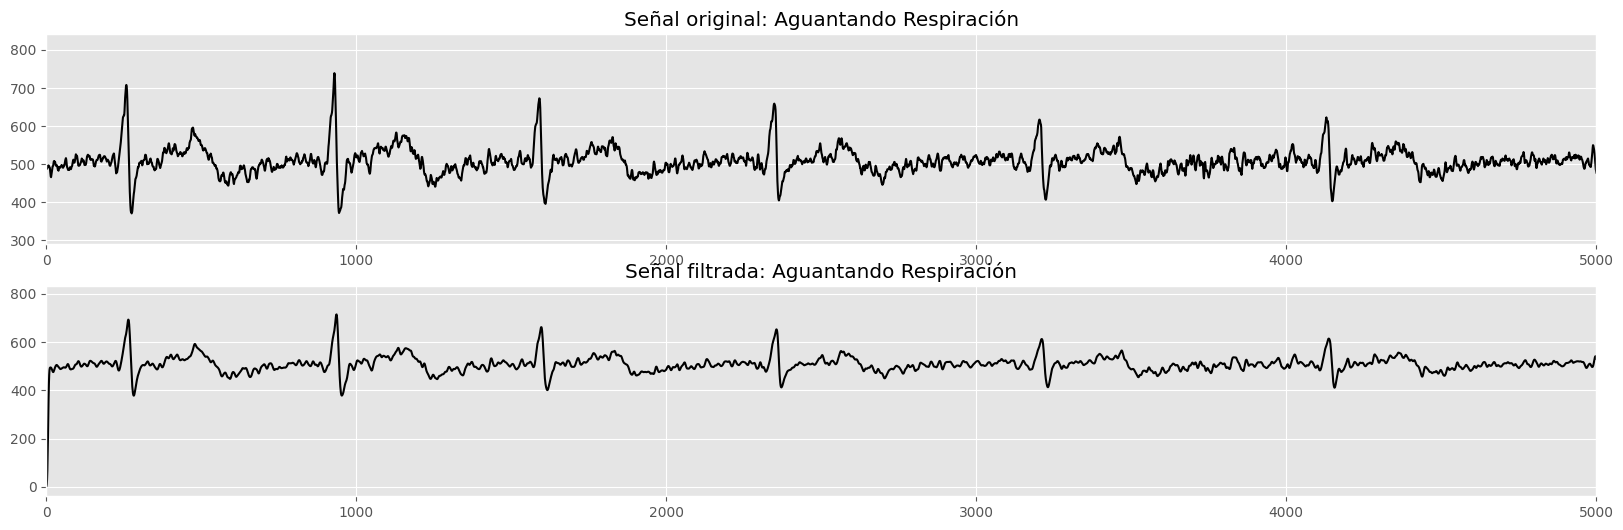

In [94]:
y = lfilter(b_blackman, np.array(1),d_sensor_respi)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_respi,'k');plt.title('Señal original: Aguantando Respiración');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'k');plt.title('Señal filtrada: Aguantando Respiración');plt.xlim(0,5000)

(0.0, 5000.0)

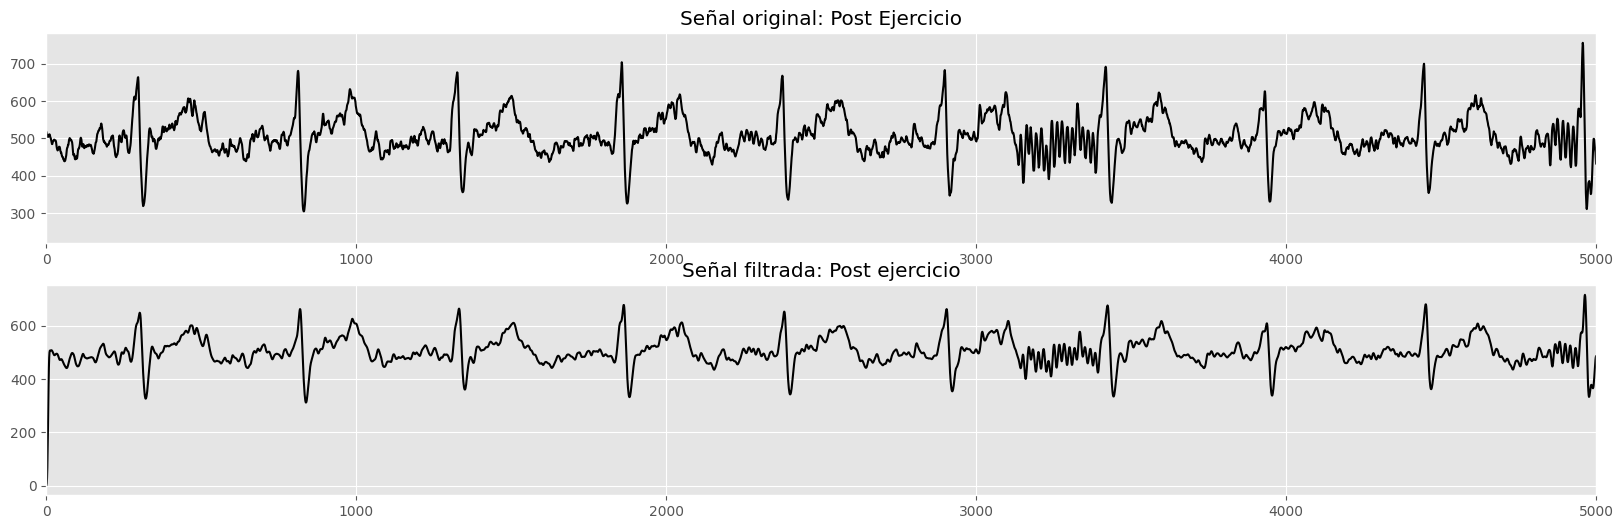

In [95]:
y = lfilter(b_blackman, np.array(1),d_sensor_ejer)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_ejer,'k');plt.title('Señal original: Post Ejercicio');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'k');plt.title('Señal filtrada: Post ejercicio');plt.xlim(0,5000)

### FIR Hamming

(0.0, 5000.0)

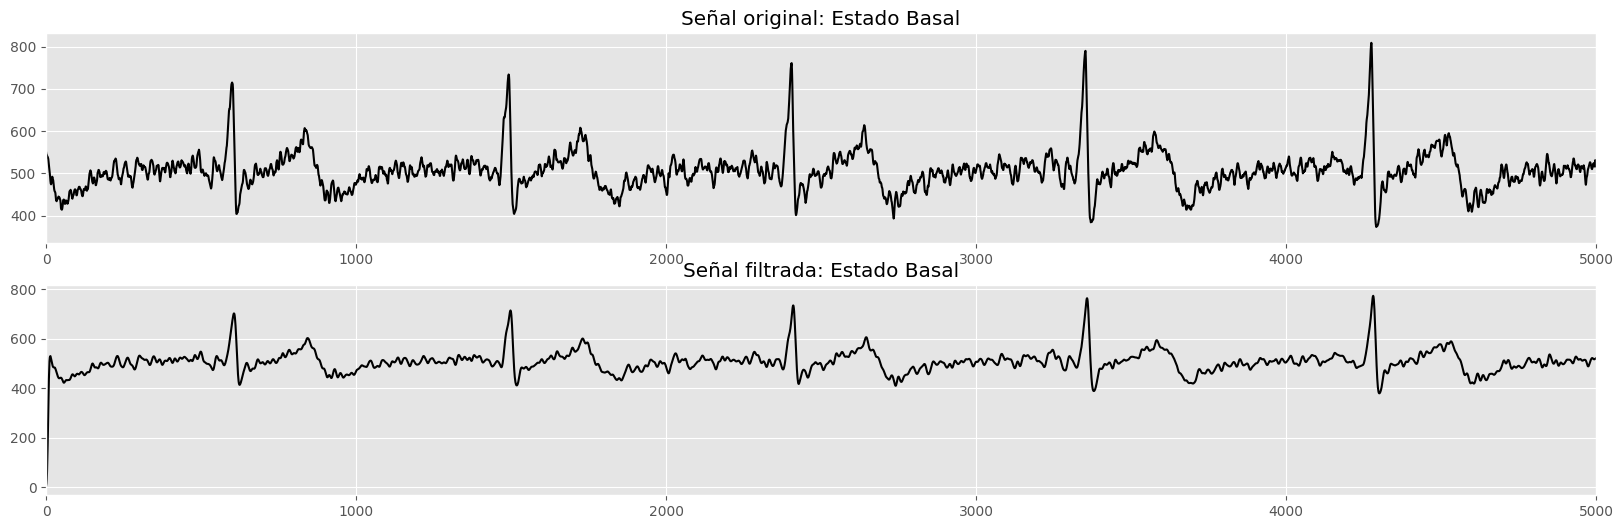

In [96]:
b_Hamming = np.array([0.009374095127456605,0.015248989077090288,0.03168550100018446,0.05610992951780696,0.08390910152312904,0.10944317615842664,0.12734290789953823,0.13377259939273567,0.12734290789953823,0.10944317615842664,0.08390910152312904,0.05610992951780696,0.03168550100018446,0.015248989077090288,0.009374095127456605])
y = lfilter(b_Hamming, np.array(1),d_sensor_basal)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_basal,'k');plt.title('Señal original: Estado Basal');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'k');plt.title('Señal filtrada: Estado Basal');plt.xlim(0,5000)

(0.0, 5000.0)

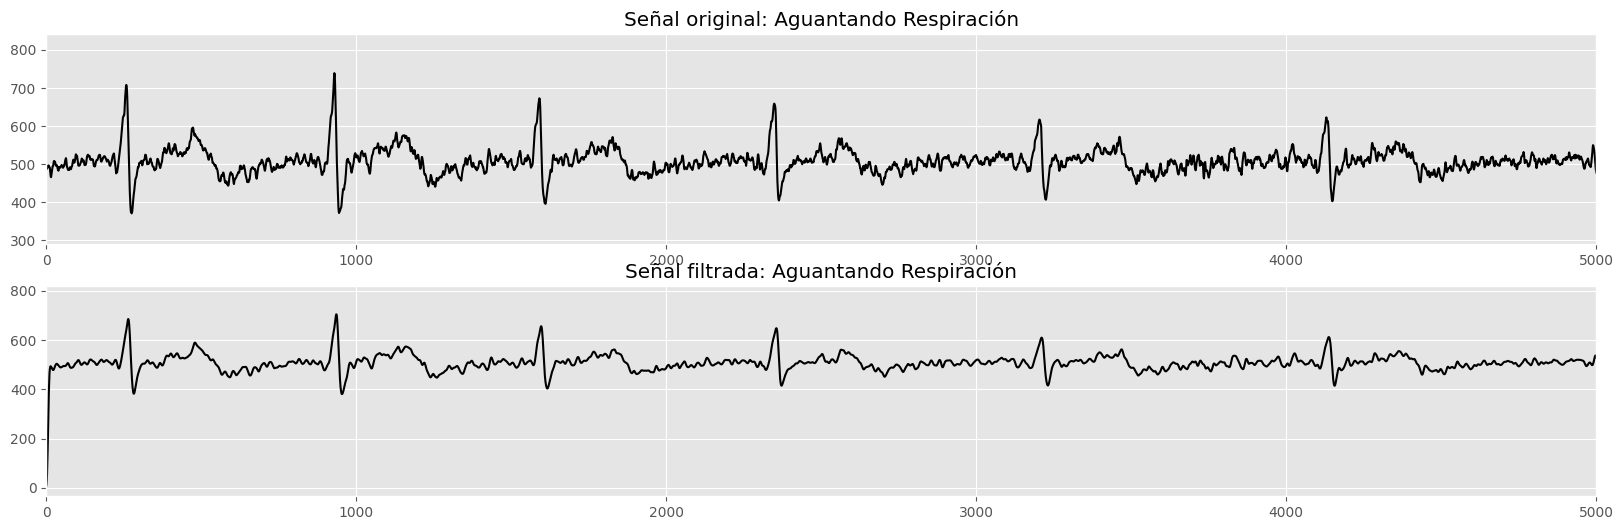

In [97]:
y = lfilter(b_Hamming, np.array(1),d_sensor_respi)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_respi,'k');plt.title('Señal original: Aguantando Respiración');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'k');plt.title('Señal filtrada: Aguantando Respiración');plt.xlim(0,5000)

(0.0, 5000.0)

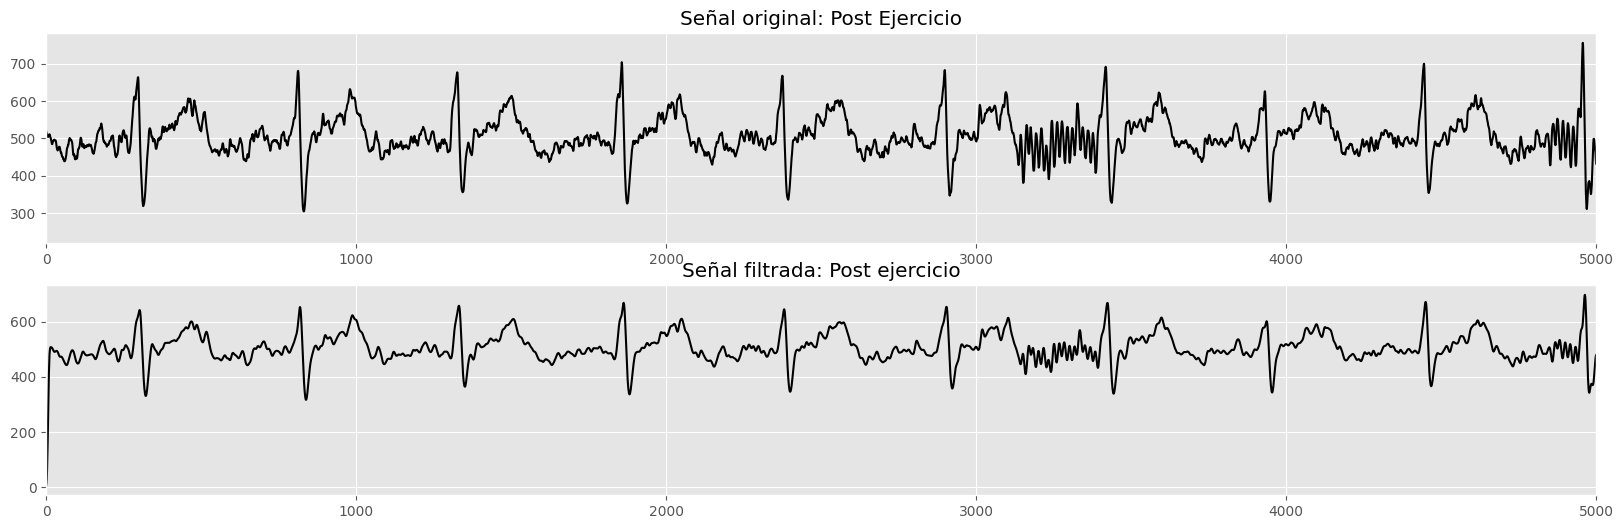

In [98]:
y = lfilter(b_Hamming, np.array(1),d_sensor_ejer)
t=np.arange(0,len(y))
plt.figure(figsize=(20,6))
plt.subplot(2, 1, 1);plt.plot(t,d_sensor_ejer,'k');plt.title('Señal original: Post Ejercicio');plt.xlim(0,5000)
plt.subplot(2, 1, 2);plt.plot(t,y,'k');plt.title('Señal filtrada: Post ejercicio');plt.xlim(0,5000)

## ALTERNATIVA DE FILTRADO RECOMENDADO PARA BITALINO

In [104]:
import biosignalsnotebooks as bsnb

# Scientific packages
from numpy import arange, sin, pi
from numpy.random import randn

data, header = bsnb.load("D:\ISB\Clases\ecg_basal-andres.h5", get_header=True)

# The data file is loaded as a Python dictionary, where each key indicates the 
# channel of the acquisition. In the next line we get the channel where the 
# ECG data was acquired.
channel = list(data.keys())[0]

# The header is also in the form of a Python dictionary. The next line saves 
# the sampling frequency of the acquired data
fs = header["sampling rate"]
# Resolution of the sensor (number of available bits)
resolution = header['resolution'][0]

# Signal Samples
signal_raw = data[channel]
time = bsnb.generate_time(signal_raw, fs)

# Let's convert the signal's units, since we know it is a ECG signal
signal = bsnb.raw_to_phy("ECG", "biosignalsplux", signal_raw, resolution, "mV")
# Creating a Butterworth filter with order 3 and low-pass frequency of 300 Hz
lfilter_signal = bsnb.lowpass(signal, 300, order=3)
filtfilt_signal = bsnb.lowpass(signal, 300, order=3, use_filtfilt=True)

data, header = bsnb.load("D:\ISB\Clases\ecg-aguantando-respiracion-andres.h5", get_header=True)

# The data file is loaded as a Python dictionary, where each key indicates the 
# channel of the acquisition. In the next line we get the channel where the 
# ECG data was acquired.
channel = list(data.keys())[0]

# The header is also in the form of a Python dictionary. The next line saves 
# the sampling frequency of the acquired data
fs = header["sampling rate"]
# Resolution of the sensor (number of available bits)
resolution = header['resolution'][0]

# Signal Samples
signal_raw = data[channel]
time = bsnb.generate_time(signal_raw, fs)

# Let's convert the signal's units, since we know it is a ECG signal
signal = bsnb.raw_to_phy("ECG", "biosignalsplux", signal_raw, resolution, "mV")
# Creating a Butterworth filter with order 3 and low-pass frequency of 300 Hz
lfilter_signal = bsnb.lowpass(signal, 300, order=3)
filtfilt_signal = bsnb.lowpass(signal, 300, order=3, use_filtfilt=True)

data, header = bsnb.load("D:\ISB\Clases\egc_ejercicio_andres.h5", get_header=True)

# The data file is loaded as a Python dictionary, where each key indicates the 
# channel of the acquisition. In the next line we get the channel where the 
# ECG data was acquired.
channel = list(data.keys())[0]

# The header is also in the form of a Python dictionary. The next line saves 
# the sampling frequency of the acquired data
fs = header["sampling rate"]
# Resolution of the sensor (number of available bits)
resolution = header['resolution'][0]

# Signal Samples
signal_raw = data[channel]
time = bsnb.generate_time(signal_raw, fs)

# Let's convert the signal's units, since we know it is a ECG signal
signal = bsnb.raw_to_phy("ECG", "biosignalsplux", signal_raw, resolution, "mV")
# Creating a Butterworth filter with order 3 and low-pass frequency of 300 Hz
lfilter_signal = bsnb.lowpass(signal, 300, order=3)
filtfilt_signal = bsnb.lowpass(signal, 300, order=3, use_filtfilt=True)

ModuleNotFoundError: No module named 'bokeh.plotting.figure'